In [148]:
import pandas as pd
import numpy as np

In [154]:
survey = pd.read_csv(r"C:\Users\ADMIN\Desktop\Python_project_data\survey.csv")

In [155]:
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [4]:
survey.shape

(6867, 14)

In [6]:
survey.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')

In [7]:
survey.dtypes

response_id           int64
collection_date      object
urban_rural          object
education            object
income               object
Vote_Now             object
Past_Vote            object
CM_satisfaction      object
MLA_satisfaction     object
age                  object
gender               object
assembly_no           int64
category             object
weight              float64
dtype: object

In [9]:
survey.isna().sum()

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

In [11]:
survey.isnull().sum()

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

# 1. How many samples were collected each day?

In [12]:
survey['collection_date'] = pd.to_datetime(survey['collection_date'])

In [13]:
survey['day'] = survey['collection_date'].dt.day

In [14]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,24


In [22]:
survey['collection_date'].nunique()

9

In [16]:
survey['day'].value_counts()   # It shows all unique values with their counts in the series.

24    1479
25     998
28     761
27     665
29     620
1      607
26     598
30     582
31     557
Name: day, dtype: int64

In [19]:
survey.groupby('day').count()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
day,,,,,,,,,,,,,,
1,607,607,607,607,607,607,607,607,607,607,607,607,607,607
24,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479
25,998,998,998,998,998,998,998,998,998,998,998,998,998,998
26,598,598,598,598,598,598,598,598,598,598,598,598,598,598
27,665,665,665,665,665,665,665,665,665,665,665,665,665,665
28,761,761,761,761,761,761,761,761,761,761,761,761,761,761
29,620,620,620,620,620,620,620,620,620,620,620,620,620,620
30,582,582,582,582,582,582,582,582,582,582,582,582,582,582
31,557,557,557,557,557,557,557,557,557,557,557,557,557,557


In [38]:
survey.drop(columns= 'day', axis=1, inplace =True)

# 2. What proportion of the total respondents were aged less than 45?

In [20]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,24


In [24]:
type(survey['age'][0])

str

In [25]:
survey['age'] = pd.to_numeric(survey['age'])

ValueError: Unable to parse string "24ko" at position 123

In [26]:
survey['age'][123]

'24ko'

In [27]:
survey['age'].replace({'24ko':'24'}, inplace=True)

In [28]:
survey['age'][123]

'24'

In [29]:
survey['age'] = pd.to_numeric(survey['age'])

In [30]:
type(survey['age'][0])

numpy.int64

In [33]:
survey[survey['age'] < 45].count()

response_id         6399
collection_date     6399
urban_rural         6399
education           6399
income              6399
Vote_Now            6399
Past_Vote           6399
CM_satisfaction     6399
MLA_satisfaction    6399
age                 6399
gender              6399
assembly_no         6399
category            6399
weight              6399
day                 6399
dtype: int64

In [35]:
survey.shape

(6867, 15)

In [36]:
propotion_aged_less_than_45 = (6399/6867)*100
propotion_aged_less_than_45

93.18479685452162

# 3. Create a new column in dataframe ' age_group'. This column should contain the age group the respondant belong to. The age groups are 18-25, 25-40, 40-55, and 55+. 

In [156]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [151]:
###### CAN WORK USING THIS COMMAND, BUT WE NEED NUMPY FOR THIS########################################################

#survey['age_group'] = pd.cut(x=survey['age'], bins=[18, 25, 40, 55, np.inf],labels=['18-25', '25-40', '40-55','55+'])
#survey.head(2)

In [152]:
data = survey.copy()

In [41]:
data.head(1)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969


In [47]:
data.insert(10, 'age_group', survey.age)

In [48]:
data.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419


In [49]:
data1 = data[(data.age_group >= 18) & (data.age_group < 25)]

In [50]:
data1['age_group'] = '18-25'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11296\2139180286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['age_group'] = '18-25'


In [54]:
data1.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519


In [55]:
data2 = data[(data.age_group >= 25) & (data.age_group < 40)]

In [56]:
data2['age_group'] = '25-40'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11296\1359659790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['age_group'] = '25-40'


In [57]:
data3 = data[(data.age_group >= 40) & (data.age_group < 55)]

In [58]:
data3['age_group'] = '40-55'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11296\2008463081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['age_group'] = '40-55'


In [59]:
data4 = data[(data.age_group >= 55)]

In [60]:
data4['age_group'] = '55+'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11296\2931846356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['age_group'] = '55+'


In [62]:
data4.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
69,70,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",RJD,INC,Fully Dissatisfied,Fully Satisfied,74,55+,Male,192,ST,1.805903
74,75,2017-05-24,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Somewhat Dissatisfied,Somewhat Satisfied,70,55+,Male,183,BC,0.343147
121,122,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",NOTA,Did not vote,Somewhat Satisfied,Fully Dissatisfied,58,55+,Male,187,Gen,2.092567
126,127,2017-05-24,Urban,Graduate,"₹ 80,000 - ₹ 1,50,000",NOTA,BJP,Fully Dissatisfied,Fully Dissatisfied,56,55+,Male,183,Gen,2.092567
183,184,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55+,Male,175,BC,2.824391


In [87]:
data = pd.concat([data1,data2,data3,data4])

In [88]:
data.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,2017-05-24,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519


In [84]:
data.to_csv('C:\\Users\\ADMIN\\Desktop\\Python_project_data\\data.csv', index = False)

# 4. How many samples were collected for each age group? Which age group had the most samples?

In [73]:
data['age_group'].value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

# 5. What proportion of respondents has opted for the RJD party in both the Vote_now and Past_Vote questions?

In [74]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [75]:
survey[(survey['Vote_Now'] == 'RJD') & (survey['Past_Vote'] == 'RJD')]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
9,10,2017-05-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,Male,194,BC,0.769738
19,20,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,37,Male,200,BC,0.936383
21,22,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,29,Male,210,BC,0.713059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,6847,2017-06-01,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,31,Male,151,BC,0.483757
6848,6849,2017-06-01,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",RJD,RJD,Fully Dissatisfied,Can’t say,27,Male,143,BC,0.200389
6858,6859,2017-06-01,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,Male,241,Gen,1.812926
6860,6861,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,25,Male,145,BC,0.528469


In [76]:
survey.shape

(6867, 14)

In [78]:
proportion_opted_always_RJD = (811/6867)*100
print('proportion_opted_always_RJD: ', proportion_opted_always_RJD)

proportion_opted_always_RJD:  11.810106305519149


# 6. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3

In [89]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [90]:
survey['day'] = survey['collection_date'].dt.day

In [91]:
survey.head(1)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24


In [94]:
df = survey[survey['CM_satisfaction'] == 'Fully Satisfied']

In [95]:
df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,24
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,24
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,Male,199,Gen,0.226477,24
17,18,2017-05-24,Urban,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,Male,200,Gen,0.181242,24
28,29,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,24


In [107]:
a = df.groupby('day')['CM_satisfaction'].value_counts()

In [108]:
b = survey.groupby('day')['CM_satisfaction'].count()

In [112]:
print('Respondants fully satisfied by performance of CM: \n\n', ((a/b)*100)  )

Respondants fully satisfied by performance of CM: 

 day  CM_satisfaction
1    Fully Satisfied    12.355848
24   Fully Satisfied     9.871535
25   Fully Satisfied     9.519038
26   Fully Satisfied     9.866221
27   Fully Satisfied     8.120301
28   Fully Satisfied    12.089356
29   Fully Satisfied    11.774194
30   Fully Satisfied    11.168385
31   Fully Satisfied    11.131059
Name: CM_satisfaction, dtype: float64


# 7. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with the MLA. Create a line plot of the result with date on x-axis and proportion on y-axis.

In [113]:
survey.head(1)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24


In [114]:
df = survey[survey['MLA_satisfaction'] == 'Fully Dissatisfied']

In [115]:
df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,24
5,6,2017-05-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603,24
6,7,2017-05-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283,24
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,24


In [118]:
a = df.groupby('day')['MLA_satisfaction'].value_counts()
a.head()

day  MLA_satisfaction  
1    Fully Dissatisfied    385
24   Fully Dissatisfied    887
25   Fully Dissatisfied    630
26   Fully Dissatisfied    353
27   Fully Dissatisfied    403
Name: MLA_satisfaction, dtype: int64

In [119]:
b = survey.groupby('day')['MLA_satisfaction'].count()
b.head()

day
1      607
24    1479
25     998
26     598
27     665
Name: MLA_satisfaction, dtype: int64

In [121]:
c =  ((a/b)*100)
print('Respondants fully dissatisfied by performance of MLA: \n\n',c  )

Respondants fully dissatisfied by performance of MLA: 

 day  MLA_satisfaction  
1    Fully Dissatisfied    63.426689
24   Fully Dissatisfied    59.972955
25   Fully Dissatisfied    63.126253
26   Fully Dissatisfied    59.030100
27   Fully Dissatisfied    60.601504
28   Fully Dissatisfied    60.709593
29   Fully Dissatisfied    56.451613
30   Fully Dissatisfied    62.027491
31   Fully Dissatisfied    57.630162
Name: MLA_satisfaction, dtype: float64


In [124]:
type(c)

pandas.core.series.Series

In [125]:
g = pd.DataFrame(c)

In [130]:
g.head()
g.columns

Index(['MLA_satisfaction'], dtype='object')

<AxesSubplot:xlabel='day,MLA_satisfaction'>

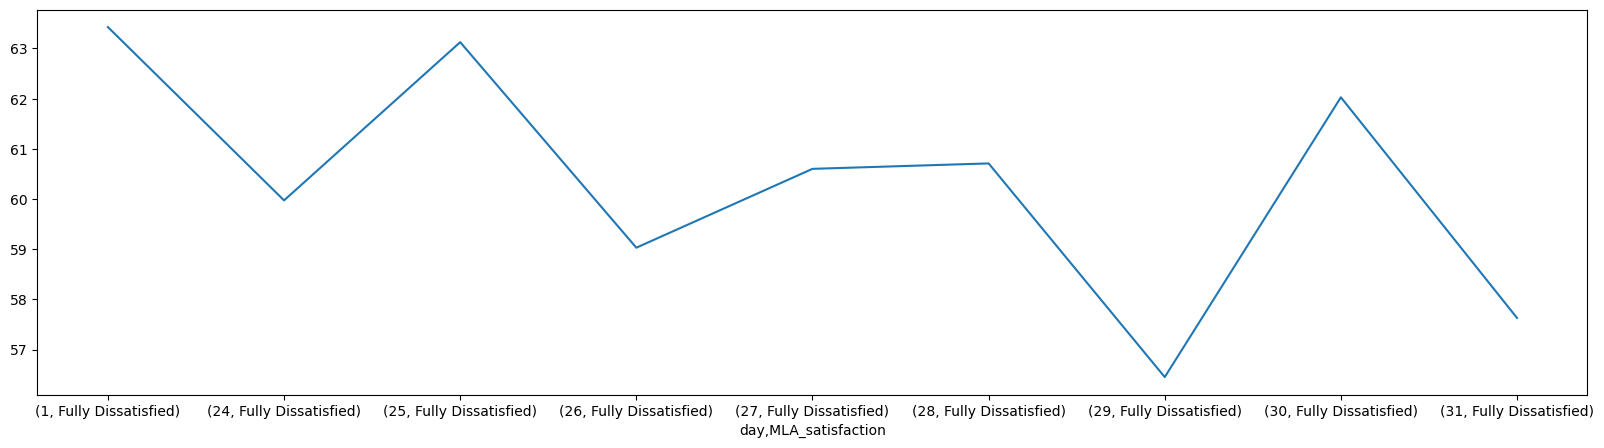

In [131]:
g.MLA_satisfaction.plot(kind='line', figsize=(20,5) )

# 8. Create a pivot table ( or crosstab) with index as Past_Vote, column as Vote_Now and cell values as the count of samples.

In [132]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,24


In [133]:
survey.pivot_table(index= 'Past_Vote', columns='Vote_Now', aggfunc='count')

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1630.0  3.0  5.0  42.0  101.0  110.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  22.0   41.0   69.0   
HAM                      2.0   NaN    25.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  57.0   10.0    9.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   254.0  2.0  2.0  45.0   72.0  279.0   
LJP                      NaN   NaN    76.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    45.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    46.0  NaN  1.0  31.0   31.0   39.0   
RLSP                     NaN   NaN    17.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                               ... weight                                   \
Vote_Now       LJP Left Front  ...    LJP Left Front   NOTA Others Plurals   
Past_Vote                      ...                                           
BJP           44.0       13.0  ...   44.0       13.0  194.0   32.0    87.0   
BSP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   
Did not vote  10.0       16.0  ...   10.0       16.0   83.0   11.0    51.0   
HAM            2.0        NaN  ...    2.0        NaN    4.0    NaN     NaN   
INC            NaN        3.0  ...    NaN        3.0    6.0    3.0     3.0   
JAP(L)         NaN        NaN  ...    NaN        NaN    NaN    1.0     NaN   
JD(U)         29.0        9.0  ...   29.0        9.0   90.0   18.0    43.0   
LJP            9.0        2.0  ...    9.0        2.0    3.0    NaN     2.0   
Left Front     NaN       18.0  ...    NaN       18.0    1.0    1.0     NaN   
NOTA           3.0        5.0  ...    3.0        5.0   46.0    7.0    11.0   
Others         1.0        4.0  ...    1.0        4.0   10.0    6.0     8.0   
RJD            4.0        9.0  ...    4.0        9.0   18.0    8.0    10.0   
RLSP           NaN        NaN  ...    NaN        NaN    3.0    NaN     2.0   
VIP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   

                                                 
Vote_Now        RJD  RJJP  RLSP Undecided   VIP  
Past_Vote                                        
BJP           370.0  88.0  24.0      62.0  10.0  
BSP             NaN   NaN   NaN       NaN   NaN  
Did not vote  195.0  20.0   3.0      31.0   5.0  
HAM             6.0   4.0   NaN       1.0   NaN  
INC           100.0   1.0   2.0       7.0   NaN  
JAP(L)          2.0   NaN   NaN       NaN   NaN  
JD(U)         435.0  13.0  25.0      36.0   6.0  
LJP            17.0   1.0   NaN       1.0   NaN  
Left Front      4.0   NaN   1.0       NaN   1.0  
NOTA           27.0   5.0   4.0       5.0   NaN  
Others         21.0   7.0   1.0       6.0   NaN  
RJD           811.0   1.0  10.0      14.0   4.0  
RLSP            8.0   2.0  12.0       1.0   1.0  
VIP             NaN   NaN   NaN       NaN   1.0  

[14 rows x 234 columns]

# 9. Repeat the above question with the cell values as sum of 'weight'

In [134]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,24


In [137]:
survey.pivot_table(index= 'Past_Vote', columns='Vote_Now', values='weight', aggfunc='sum')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806262,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


# 10. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group

In [138]:
data.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477


In [172]:
df1 = data.groupby('age_group').count()

In [173]:
type(df1)

pandas.core.frame.DataFrame

In [174]:
df1

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
age_group,,,,,,,,,,,,,,,
18-25,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567
25-40,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423
40-55,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644
55+,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108


# 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group that opted for JD(U) party in Vote_Now

In [160]:
data.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day,age_group
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,24,25-40
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,24,25-40


In [169]:
data1 =data[data['Vote_Now'] == 'JD(U)']
data1.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day,age_group
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,24,18-25
13,14,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),BJP,Somewhat Satisfied,Fully Dissatisfied,29,Male,184,Gen,0.275509,24,25-40
28,29,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,24,40-55
29,30,2017-05-24,Urban,Professional Education,"₹ 1,50,000 & above",JD(U),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,26,Male,172,BC,0.405708,24,25-40
59,60,2017-05-24,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,Male,171,BC,2.824391,24,40-55


In [175]:
df2 = data1.groupby('age_group').count()

In [176]:
df2

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
age_group,,,,,,,,,,,,,,,
18-25,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
25-40,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
40-55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
55+,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


# 12. Join/Merge the 2 dataframes from question 10 and 11 with common column as age_group.

In [177]:
df1

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
age_group,,,,,,,,,,,,,,,
18-25,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567
25-40,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423
40-55,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644
55+,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108


In [178]:
df2

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,day
age_group,,,,,,,,,,,,,,,
18-25,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
25-40,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
40-55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
55+,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [182]:
pd.merge(df1, df2, on = 'age_group', suffixes= ('_df1', '_df2') )

,response_id_df1,collection_date_df1,urban_rural_df1,education_df1,income_df1,Vote_Now_df1,Past_Vote_df1,CM_satisfaction_df1,MLA_satisfaction_df1,age_df1,...,Vote_Now_df2,Past_Vote_df2,CM_satisfaction_df2,MLA_satisfaction_df2,age_df2,gender_df2,assembly_no_df2,category_df2,weight_df2,day_df2
age_group,,,,,,,,,,,,,,,,,,,,,
18-25,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,...,199,199,199,199,199,199,199,199,199,199
25-40,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,...,245,245,245,245,245,245,245,245,245,245
40-55,644,644,644,644,644,644,644,644,644,644,...,55,55,55,55,55,55,55,55,55,55
55+,108,108,108,108,108,108,108,108,108,108,...,10,10,10,10,10,10,10,10,10,10
